In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jobs-and-salaries-in-data-field-2024/jobs_in_data_2024.csv


In [58]:
data_file = '/kaggle/input/jobs-and-salaries-in-data-field-2024/jobs_in_data_2024.csv'
data_df = pd.read_csv(data_file) 
data_df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling


## Data Analysis

In [59]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14199 non-null  int64 
 1   experience_level    14199 non-null  object
 2   employment_type     14199 non-null  object
 3   job_title           14199 non-null  object
 4   salary              14199 non-null  int64 
 5   salary_currency     14199 non-null  object
 6   salary_in_usd       14199 non-null  int64 
 7   employee_residence  14199 non-null  object
 8   work_setting        14199 non-null  object
 9   company_location    14199 non-null  object
 10  company_size        14199 non-null  object
 11  job_category        14199 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.3+ MB


In [60]:
data_df.describe()

,work_year,salary,salary_in_usd
count,14199.000000,14199.000000,14199.00000
mean,2023.110501,149057.514262,149472.04944
std,0.686929,64932.044143,64379.26016
min,2020.000000,14000.000000,15000.00000
25%,2023.000000,102150.000000,104000.00000
50%,2023.000000,142000.000000,142000.00000
75%,2024.000000,185900.000000,185900.00000
max,2024.000000,450000.000000,450000.00000


In [61]:
#Find the frequency of a job type over the year 

In [62]:
#find the type of job category 
data_df['job_category'].value_counts()

job_category
Data Science and Research         4675
Data Engineering                  3157
Data Analysis                     2204
Machine Learning and AI           2148
Leadership and Management          791
BI and Visualization               600
Data Architecture and Modeling     419
Data Management and Strategy       115
Data Quality and Operations         79
Cloud and Database                  11
Name: count, dtype: int64

In [63]:
data_df['salary_currency'].value_counts()

salary_currency
USD    13146
GBP      538
EUR      422
CAD       51
AUD       12
PLN        7
CHF        6
SGD        6
BRL        4
TRY        3
DKK        3
NZD        1
Name: count, dtype: int64

In [64]:
data_df['salary_currency'].count() == data_df['salary_in_usd'].count()

True

We have all the data available for comparison of salary in usd.

#### Find the frequency of job category over the years

In [65]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Frequency of Job Categories Over the Years')

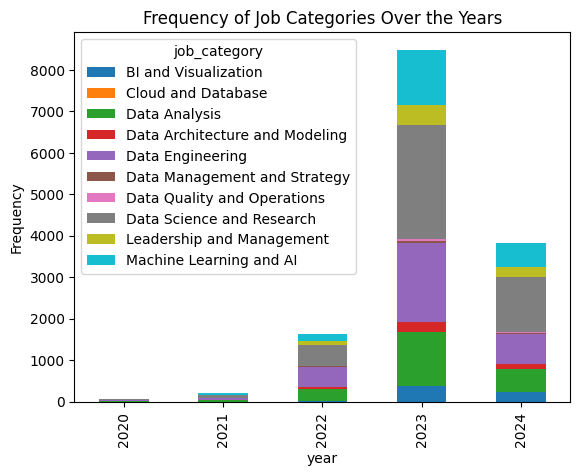

In [66]:
grouped_data = data_df.groupby(['work_year', 'job_category']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', stacked=True) 
plt.xlabel('year')
plt.ylabel('Frequency')
plt.title('Frequency of Job Categories Over the Years')

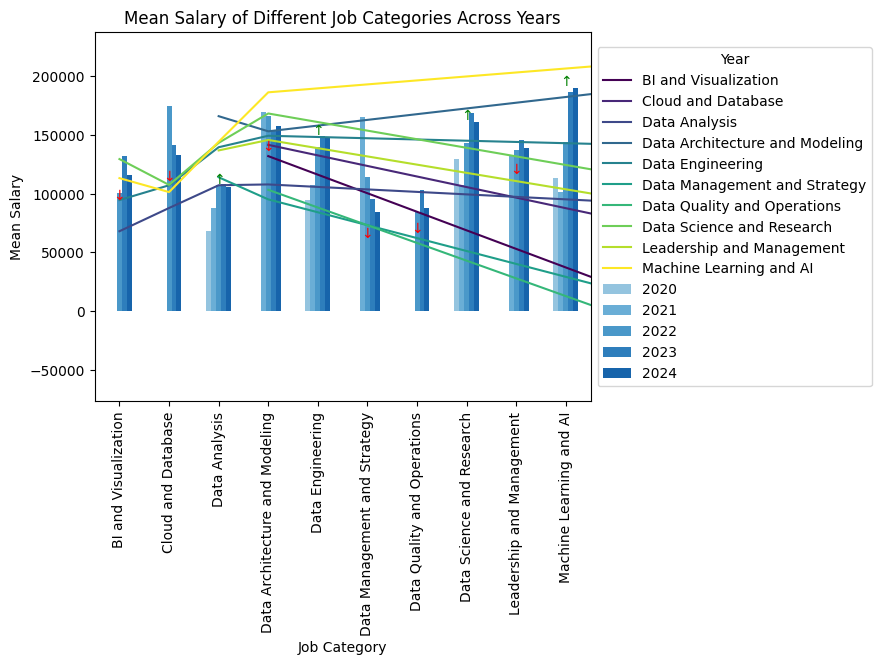

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

fig, ax = plt.subplots()
mean_salary_by_job = data_df.groupby(['job_category', 'work_year'])['salary_in_usd'].mean().unstack()
mean_salary_by_job.plot(kind='bar', ax=ax, color=plt.cm.Blues(np.linspace(0.4, 0.8, len(mean_salary_by_job.columns))))
plt.xlabel('Job Category')
plt.ylabel('Mean Salary')
plt.title('Mean Salary of Different Job Categories Across Years')
plt.legend(title='Year')

# Generate a list of colors for the lines
num_categories = len(mean_salary_by_job.index)
line_colors = plt.cm.viridis(np.linspace(0, 1, num_categories))

# Adding trend lines (smoothed curve) for each job category
for i, job_category in enumerate(mean_salary_by_job.index):
    mean_salaries = mean_salary_by_job.loc[job_category].values
    x_values = np.arange(len(mean_salaries))  # X values for the available data
    y_values = mean_salaries
    
    # Fit a linear interpolation function to the data
    interp_func = interp1d(x_values, y_values, kind='linear', fill_value='extrapolate')
    
    # Generate x values for extrapolation (beyond the available data)
    extended_x = np.arange(len(mean_salaries) + 10)  # Adjust the range as needed
    
    # Compute y values by extrapolating using the interpolation function
    extended_y = interp_func(extended_x)
    
    # Plot the curve with a unique color for each job category
    ax.plot(extended_x, extended_y, color=line_colors[i], label=job_category)

# Adding trend arrows
for i, job_category in enumerate(mean_salary_by_job.index):
    mean_salaries = mean_salary_by_job.loc[job_category].values
    trend = np.polyfit(range(len(mean_salaries)), mean_salaries, 1)[0]  # Get the slope of the trend line
    arrow_color = 'green' if trend > 0 else 'red'
    arrow_direction = '↑' if trend > 0 else '↓'
    ax.annotate(arrow_direction, xy=(i, mean_salaries[-1]), xytext=(0, 5 if trend > 0 else -15),
                textcoords='offset points', color=arrow_color, ha='center', va='center')

# Move legend to the end of the bar chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Year')

plt.show()


Over the years as we progressed from covid in early 2020, we see that there is a decline in the salary in usd of jobs such as 
-  BI and Visualization 
-  Cloud and Databases 
-  Data Analysis 

And an increasing trend in salary in usd for a booming roles in
- Machine Learning and AI 
- Data Architecture and Modeling 


In [68]:
#Matrix Correlation 
corr = data_df[['work_year', 'salary_in_usd']].corr()
corr.style.background_gradient(cmap='ocean_r')

,work_year,salary_in_usd
work_year,1.000000,0.077343
salary_in_usd,0.077343,1.000000


Since the correlation coefficient is less than 0.1, there is a weak relationship between work year and salary. 

#### How many employees are working remotely, or on site? 

In [69]:
matches = data_df['employee_residence'].str.lower() == data_df['company_location']
print("Comparison Result:")
print(data_df[['company_location', 'employee_residence']])
print("\nMatch Status:")
print(matches)

# Find rows where the comparison is true
matching_rows = data_df[matches]

# Print matching rows
print("Rows where company and employee locations match:")
print(matching_rows)

Comparison Result:
      company_location employee_residence
0       United Kingdom     United Kingdom
1        United States      United States
2        United States      United States
3               Canada             Canada
4               Canada             Canada
...                ...                ...
14194    United States      United States
14195    United States      United States
14196    United States      United States
14197    United States      United States
14198    United States      United States

[14199 rows x 2 columns]

Match Status:
0        False
1        False
2        False
3        False
4        False
         ...  
14194    False
14195    False
14196    False
14197    False
14198    False
Length: 14199, dtype: bool
Rows where company and employee locations match:
Empty DataFrame
Columns: [work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, work_setting, company_location, company_size, job_ca

All employees are employed in the same country that they are residing in. 

/tmp/ipykernel_33/2603707144.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


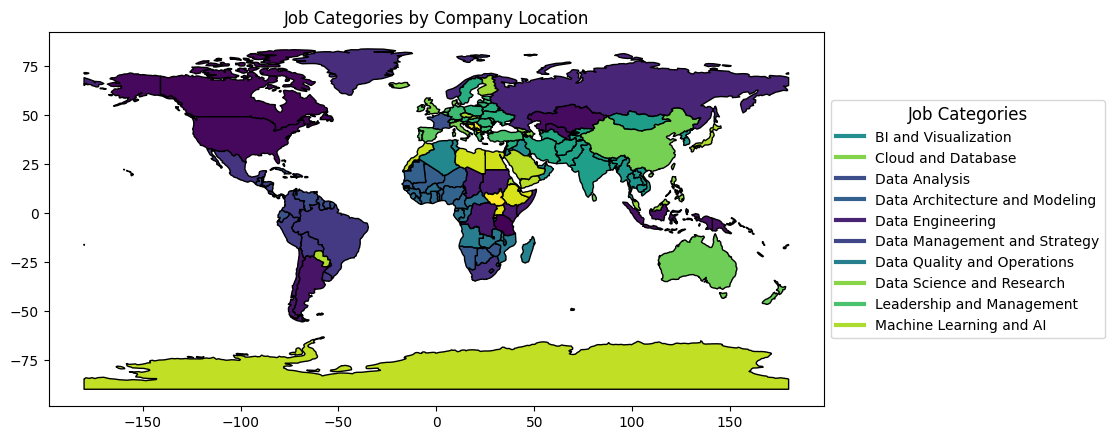

In [70]:
import geopandas as gpd
from matplotlib.colors import ListedColormap

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Aggregate job categories by company location
job_category_counts = data_df.groupby('company_location')['job_category'].value_counts().unstack(fill_value=0)

# Merge the world map with the DataFrame based on the 'Country' column
world = world.merge(job_category_counts, how='left', left_on='name', right_index=True)

# Plot the map
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, cmap='viridis', edgecolor='black')

# Generate random colors for each job category
num_categories = len(job_category_counts.columns)
colors = [plt.cm.viridis(np.random.rand()) for _ in range(num_categories)]

# Create a custom legend with random colors
cmap = ListedColormap(colors)  # Define colormap with random colors
for i, job_category in enumerate(job_category_counts.columns):
    ax.plot([], [], color=colors[i], label=job_category, linewidth=3)  # Add fake plot for each category to the legend

# Add legend outside of the graph
legend = plt.legend(title='Job Categories', loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize='large')  # Adjust title font size

# Add title
plt.title('Job Categories by Company Location')

# Show the plot
plt.show()


For each job category, we can see which country has each of them in a higher percentage. For example, 
- In United States: We see a trend for more data management and strategy and data engineering.
- In China we can see more jobs for Machine Learning and AI.

#### Find what kind of data job settings have increased over the year? 

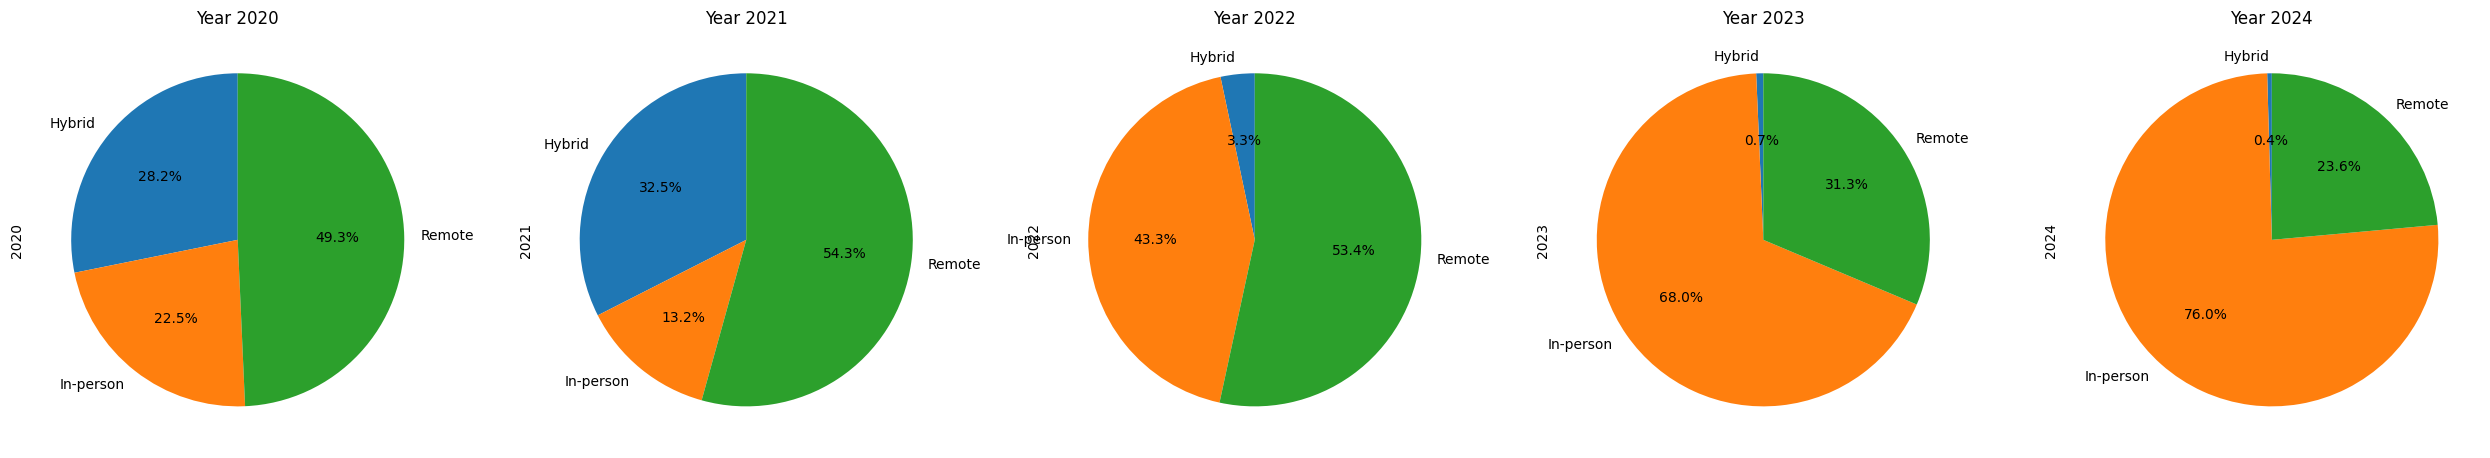

In [71]:
# Group data by year and job setting and count frequencies 
job_setting_counts = data_df.groupby(['work_year', 'work_setting']).size().unstack(fill_value=0)

years = job_setting_counts.index 
num_years = len(years)

fig, axes = plt.subplots(1, num_years, figsize=(5*num_years,5))

for i, year in enumerate(years): 
    job_setting_counts.loc[year].plot.pie(autopct='%1.1f%%',startangle=90, ax=axes[i])
    axes[i].set_title(f"Year {year}")
    
plt.tight_layout()
plt.show()

We went from a rapid increased in remote jobs from year 2020 to 2021, and drastically started gradually decreasing from year 2022 till present. 
Currently, we have more options for in-person jobs than remote and hybrid is significantly low after dropping by roughly 28%. 

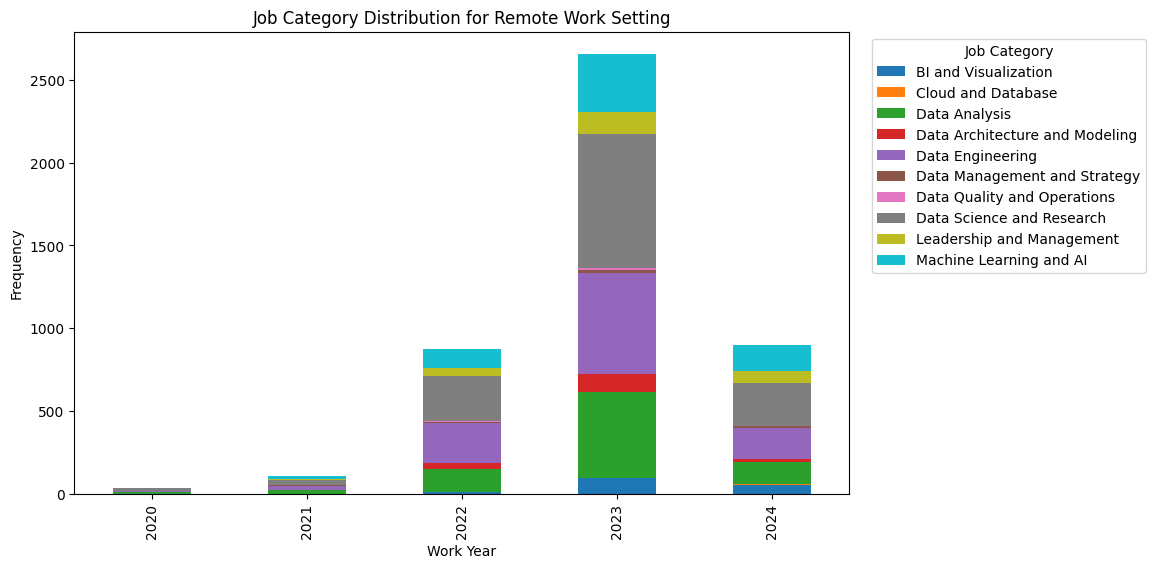

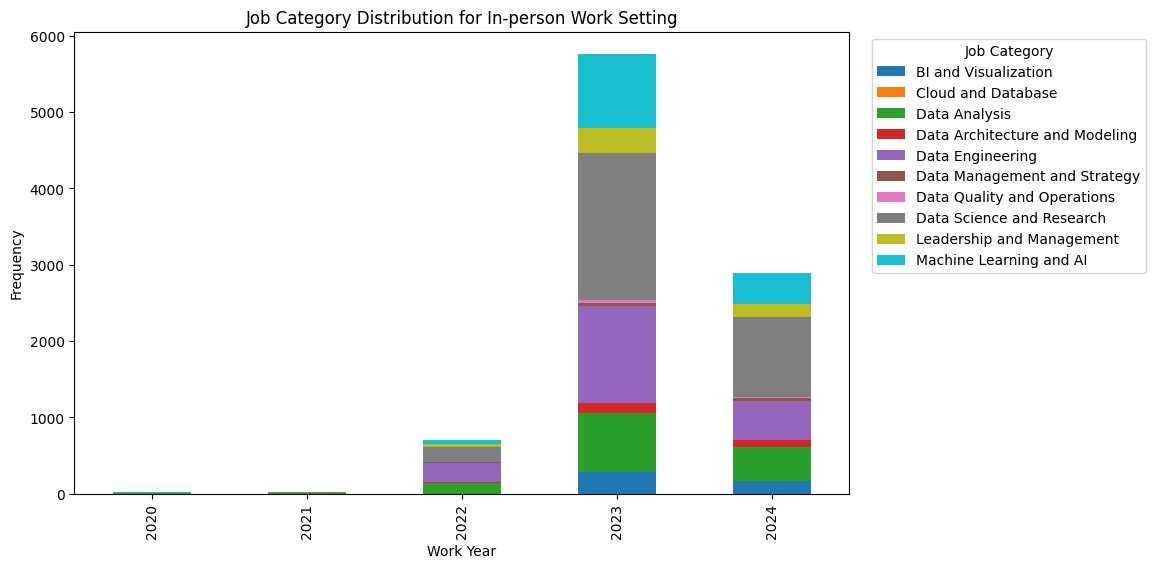

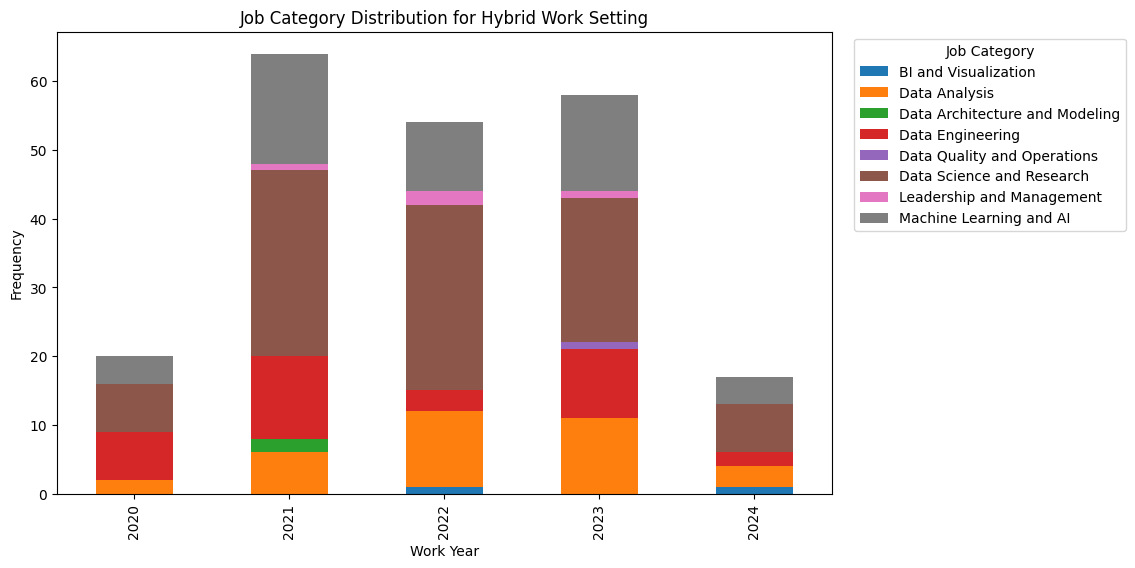

In [72]:
# Get unique work settings
work_settings = data_df['work_setting'].unique()

# Iterate over each work setting
for work_setting in work_settings:
    # Filter data for the current work setting
    subset_df = data_df[data_df['work_setting'] == work_setting]
    
    # Group data by work year and job category, and count occurrences
    grouped_data = subset_df.groupby(['work_year', 'job_category']).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    grouped_data.plot(kind='bar', stacked=True, ax=ax)

    # Add labels and legend outside of the chart
    plt.xlabel('Work Year')
    plt.ylabel('Frequency')
    plt.title(f'Job Category Distribution for {work_setting.capitalize()} Work Setting')

    # Create legend for job categories
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles, labels, title='Job Category', bbox_to_anchor=(1.02, 1), loc='upper left')

    plt.show()

#### Understand the current trend for work setting

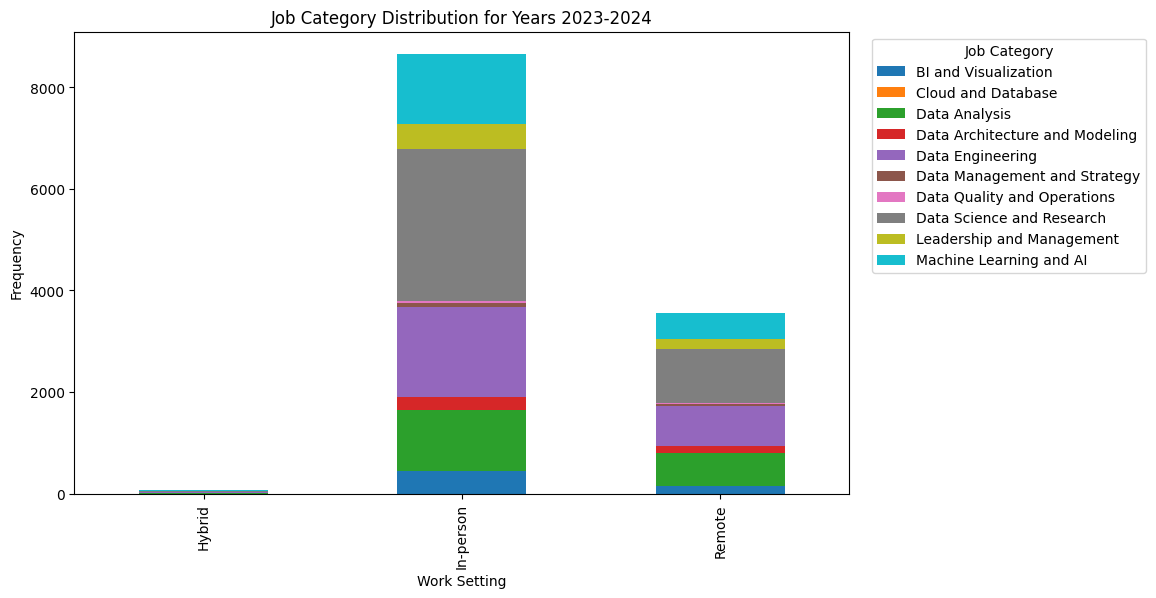

In [73]:
# Filter data for years 2023 and 2024
data_2023_2024 = data_df[data_df['work_year'].isin([2023, 2024])]

# Group data by work setting and job category, and count occurrences
grouped_data = data_2023_2024.groupby(['work_setting', 'job_category']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Add labels and legend outside of the chart
plt.xlabel('Work Setting')
plt.ylabel('Frequency')
plt.title('Job Category Distribution for Years 2023-2024')

# Create legend for job categories
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title='Job Category', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()

For the year 2023 and early 2024, we find the following job category being more popular for the specific job setting: 

| Position | Hybrid | In Person | Remote |
|----------|--------|--------------|--------|
| 1        | Data Science & Research | Data Science & Research       | Data Science & Research |
| 2        | Machine Learning & AI | Data Engineering       | Data Engineering |
| 3        | Data Engineering & Modelling | Machine Learning & AI       | Data Analysis |

We consistently saw that Data Science & Research jobs were popular in any job settings whether remote, hybrid, or in-person.

#### Inspect the different job titles in the market? 

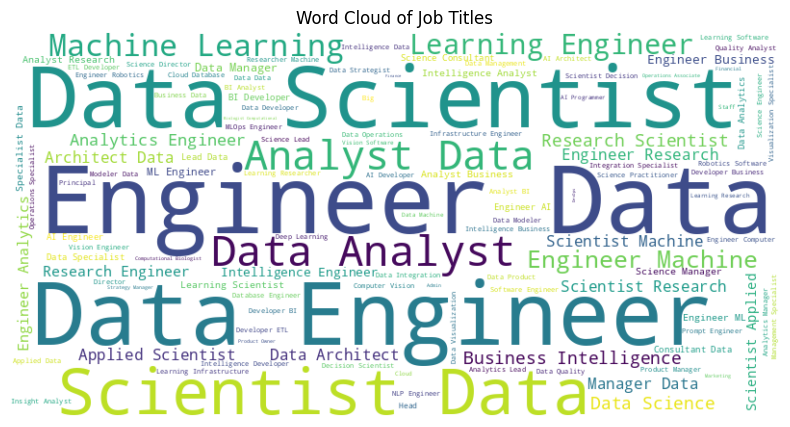

In [75]:
from wordcloud import WordCloud

# Concatenate all job titles into a single string
text = ' '.join(data_df['job_title'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Job Titles')
plt.axis('off')
plt.show()

#### Inspect the top 5 job titles across the work year

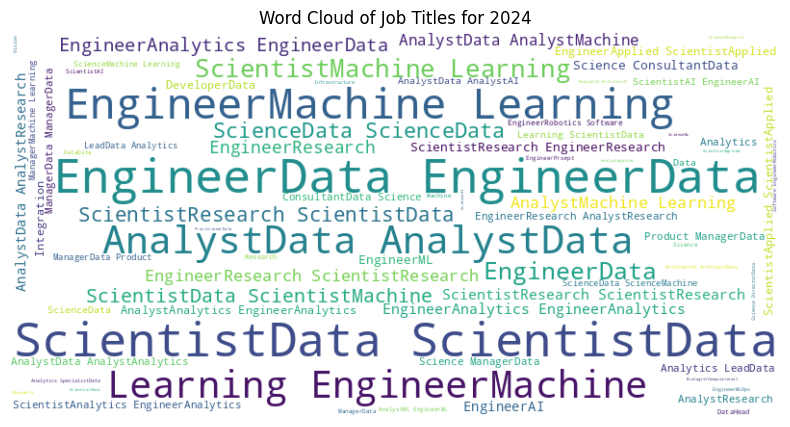

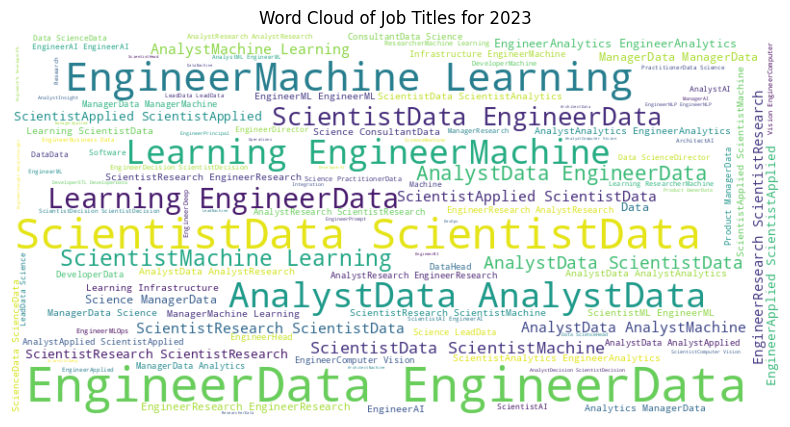

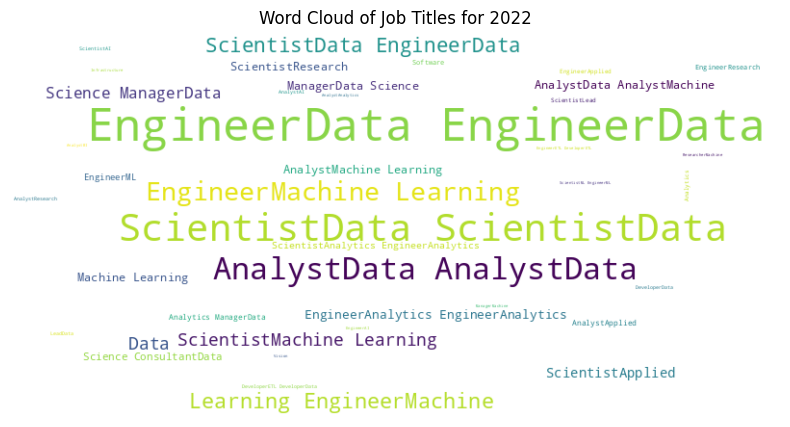

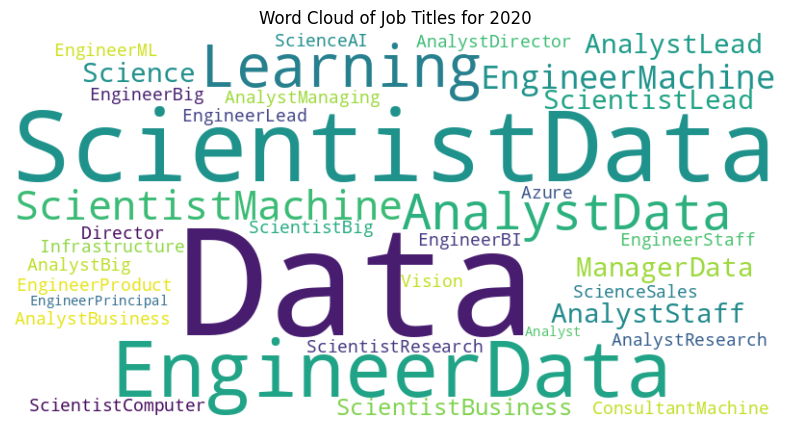

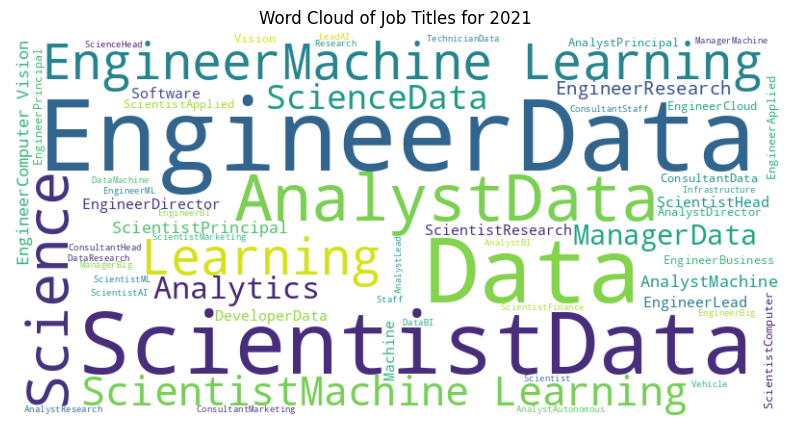

In [76]:
#Get the top 5 job categories
top_job_categories = data_df['job_category'].value_counts().nlargest(5).index

#Create a word cloud for each work year 
for work_year in data_df['work_year'].unique(): 
    #Filter data for the current work year 
    subset_df = data_df[data_df['work_year'] == work_year] 
    #concatenate job titles for the top 5 categories 
    job_titles = ''.join(subset_df[subset_df['job_category'].isin(top_job_categories)]['job_title'])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud of Job Titles for {work_year}')
    plt.axis('off')
    plt.show()

We did not notice any major change in the way job titles were described across the work years. There are some weird of typing out the same job titles, which is not significant since we are focusing our analysis on the job category instead. 

#### Find a relationship between work experience and company size

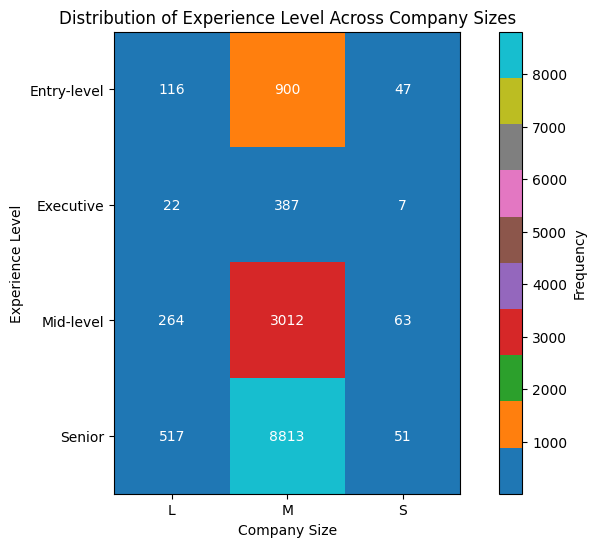

In [82]:
#Create a pivot table to summarize the frequency of occurrence of each combination of experience level and company size 
pivot_table = data_df.pivot_table(index='experience_level', columns='company_size', aggfunc='size', fill_value=0)

#Visualize the pivot table as a heatmap 
plt.figure(figsize=(10,6))
plt.imshow(pivot_table,cmap='tab10', interpolation='nearest') 

# Add annotations to convey the message
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        plt.text(j, i, pivot_table.iloc[i, j], ha='center', va='center', color='white')
#Add labels 
plt.title('Distribution of Experience Level Across Company Sizes')
plt.xlabel('Company Size') 
plt.ylabel('Experience Level')

#Add a color bar 
plt.colorbar(label='Frequency')

#Customize the tick labels 
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

#Show the plot 
plt.show()

Most data jobs are found in medium sized companies. However, the structure of data jobs goes mostly from being in larger numbers for the positions of senior, mid-level, and entry-level positions in this order for large and medium sized companies. In small companies, we see a trend for more mid-level roles and the least ones in entry-level.

| Company Size | Entry-Level | Mid-Level | Senior |
|--------------|-------------|-----------|--------|
| Large        | 3           | 2         | 1      |
| Medium       | 3           | 2         | 1      |
| Small        | 3           | 1         | 2      |

In this representation, entry-level positions are now listed first, followed by mid-level and then senior positions, within each company size. Adjust the numbers based on your specific data and analysis.

Hence, entry-level jobs can be equally hard to obtain irrespective of company size, compared to other experience levels. 
